# Projektaufgabe Wärmeleitung von Mauro Schegg und Rino Albertin:

**Erstellt am:** 
- 19.11.2024

**Die zwei Simulationsparameter:**
- $r_i = 2.5~\text{cm}, r_a  = 4.5~\text{cm}$

# 1. Rohr-Isolation:

**Geg.:**
- $r_i = 0.025~\text{m}$ Innenradius

- $r_a  = 0.045~\text{m}$ Aussenradius

- $T(r_i) = T_i = 80~\text{°C}$ Dirichlet-Randbedingung an der Innenseite

- $T_a = 20~\text{°C}$ Lufttemperatur an der Aussenseite (Robin-Randbedingung)

- $h = 5~\frac{\text{W}}{\text{m}^2 \cdot \text{K}}$ Wärmeübergangskoeffizient

- $k = 0.5~\frac{\text{W}}{\text{m} \cdot \text{K}}$ Wärmeleitfähigkeit

## Aufgabe 1 Handrechnung:

**Geg.:**
- $T(r)  = A~\text{ln}(\frac{r}{r_i}) + B$ 
- $r = [r_i,r_a] = [0.025~\text{m},0.045~\text{m}] $

**Ges.:**
- Lösung $T(r)$

**Visualisierung:**

Text(0.5, 0.92, 'Plot von T(r) für A=1,B=0')

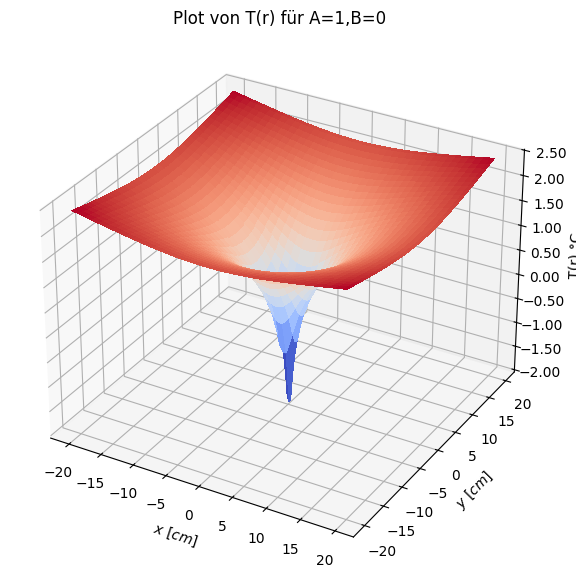

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ri = 2.5  # Innenradius [cm]

# Einstellungen für die Anzeige
X = np.arange(-20, 20, 0.25)
# Ohne null wegen des ln
X = X[X != 0]
Y = np.arange(-20, 20, 0.25)
Y = Y[Y != 0]
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
T = np.log(R / ri)

# Plot der Figur
surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter("{x:.02f}")
ax.zaxis.label.set_rotation(90)

ax.set_xlabel("$x~[cm]$")
ax.set_ylabel("$y~[cm]$")
ax.set_zlabel("T(r) °C")
plt.title("Plot von T(r) für A=1,B=0")

Erkenntnis durch die Visualisierung: 
- Der natürliche Logarithmus würde die Funktion für einen Radius gegen 0 unphysikalisch machen, da die Temperatur gegen minus unendlich gehen würde. Der Radius ist jedoch beim Innenradius begrenzt, was zu keinem Problem führt $\text{ln}(1) = 0.$ 

**Rechnung:**

Berechnung von B mit Randbedingung 1:

$$\text{RB1:}~T(r_i) = 353~\text{K} $$
$$T(r_i)  = A \cdot \text{ln}(\frac{r_i}{r_i})+B = 353~\text{K} => B = 353~\text{K}$$
$$T(r_a)  = A \cdot\text{ln}(\frac{r_a}{r_i})+ 353~\text{K}$$

Berechnung der Wärmestromdichten:
$$q_{conv} = -h \cdot (T_a-T(r_a))$$
$$q_{cond} = -k \cdot \frac{\partial{T}}{\partial{r}}$$

Berechnung von A für $r_a = 0.045~\text{m}$ mit Randbedingung 2:
$$\text{RB2:}~q_{cond}~|_{r_a} = q_{conv} $$
$$-k \cdot \frac{\partial{T}}{\partial{r}}~|_{r_a} = -h(T_a-T(r_a)) $$
$$-k \cdot A \cdot \frac{1}{r_a} = -h(T_a-A \cdot\text{ln}(\frac{r_a}{r_i})-353~\text{K})$$
$$A= \frac{-h \cdot 60~\text{K}}{h \cdot \text{ln}(\frac{r_a}{r_i})+\frac{k}{r_a}} = -21.4~\text{K}$$

**Lösung:**
- $T(r) = -21.4~\text{K} \cdot \text{ln}(\frac{r}{r_i}) + 353.15~\text{K}$

**Visualisierung der Lösung:**

Text(0.5, 0.92, 'Temperaturabfall von T(r)')

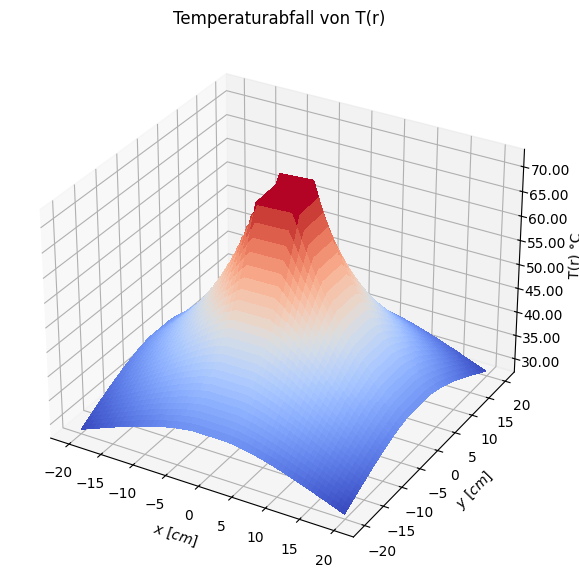

In [44]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ri = 0.025  # Innenradius [m]

# Einstellungen für die Anzeige

x1 = np.arange(0.025, 0.2, 0.001)
x2 = np.arange(-0.20, -0.025, 0.001)

y1 = np.arange(0.025, 0.2, 0.001)
y2 = np.arange(-0.20, -0.025, 0.001)

Y = np.concatenate([y2, y1])
X = np.concatenate([x2, x1])
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
T = -21.4 * np.log(R / ri) + 80

# Plot der Figur
surf = ax.plot_surface(X*100, Y*100, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter("{x:.02f}")

ax.set_xlabel("$x~[cm]$")
ax.set_ylabel("$y~[cm]$")
ax.set_zlabel("T(r) °C")
plt.title("Temperaturabfall von T(r)")

Text(0.5, 1.0, 'Temperaturverlauf mit Handrechnung')

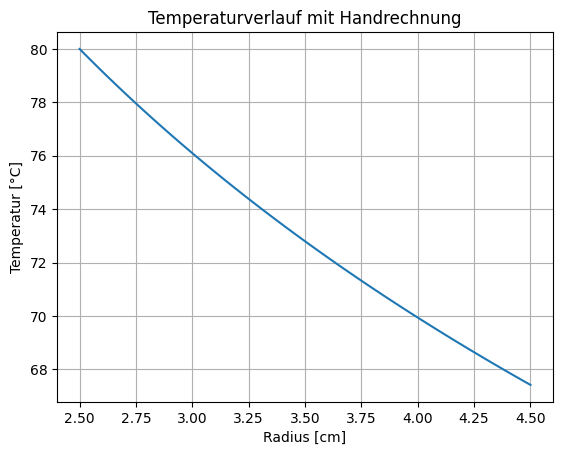

In [45]:
T = lambda r: -21.4 *np.log(r/0.025)+80
r = np.linspace(0.025,0.045)
plt.plot(r*100,T(r))
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf mit Handrechnung")

#### Beobachtung bei der Exploration:

Bei dem Versuch für grösse $r_a$ mit der Formel
$$T(r) = -21.4~\text{K} \cdot \text{ln}(\frac{r}{r_i}) + 353.15~\text{K}$$ 
zu berechnen wurde erkannt, dass die Temperatur für grosse $r_a$ unter $T_a$ sinkt, dies würde in der Realität nicht passieren. Wird $T(r)$ bei $r_a = 1~\text{m}$ berechnet ist die Lösung $T(r) = -15.8358 \cdot \text{ln}(\frac{r_a}{r_i})+353.15~\text{K}.$ 

Die Temperatur bei AP = 1m am Rand ist 21.584°C


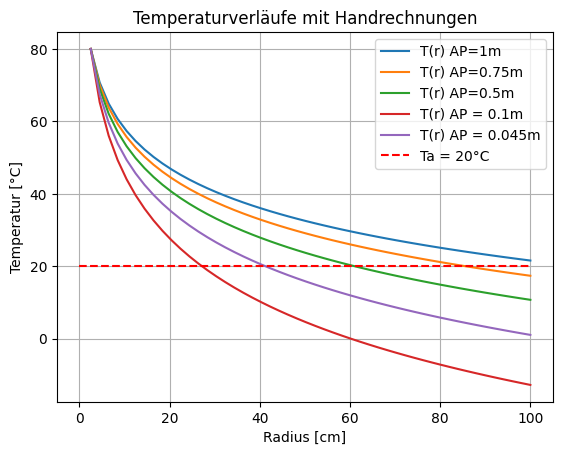

In [46]:
# T(r) beim Arbeitspunkt ra = 1 m
T1m = lambda r: -15.8358 *np.log(r/0.025)+80
# T(r) beim Arbeitspunkt ra = 0.5 m
T5 = lambda r: -18.775 *np.log(r/0.025)+80
# T(r) beim Arbeitspunkt ra = 0.75 m
T75 = lambda r: -16.9754 *np.log(r/0.025)+80
# T(r) beim Arbeitspunkt ra = 0.75 m
T01 = lambda r: -25.1436 *np.log(r/0.025)+80

# ra von ri bis 1m
r1 = np.linspace(0.025,1)
plt.plot(r1*100,T1m(r1),label="T(r) AP=1m")
plt.plot(r1*100,T75(r1),label="T(r) AP=0.75m")
plt.plot(r1*100,T5(r1),label="T(r) AP=0.5m")
plt.plot(r1*100,T01(r1),label="T(r) AP = 0.1m")
plt.plot(r1*100,T(r1),label="T(r) AP = 0.045m")
plt.hlines(y=20,xmin=0,xmax=100,colors="red",linestyles="--",label=f"Ta = 20°C")
# Ausgabe der Randtemperatur.
print(f"Die Temperatur bei AP = 1m am Rand ist {round(min(T1m(r1)),3)}°C")
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverläufe mit Handrechnungen")
plt.legend()

**Vergleich dieser Beobachtung mit Comsol:**

In [47]:
import pandas as pd
# Daten Comsol für 1m
df1m = pd.read_csv("Daten/Data_A1_Arbeitspunkt.csv",sep=",")

In [48]:
# Werte für Arbeitspunkt 1m
TA1m = df1m["T (degC)"]
x1m = len(TA1m)
r1m = np.linspace(0.025,1,x1m)

In [49]:
# Daten Comsol für 0.5m
df05m = pd.read_csv("Daten/Data_A1_Arbeitspunkt05.csv",sep=",")

In [50]:
# Werte für Arbeitspunkt 0.5m
TA05m = df05m["T (degC)"]
x05m = len(TA05m)
r05m = np.linspace(0.025,0.5,x05m)

In [51]:
# Daten Comsol für 0.1m
df01m = pd.read_csv("Daten/Data_A1_Arbeitspunkt01.csv",sep=",")

In [52]:
# Werte für Arbeitspunkt 0.5m
TA01m = df01m["T (degC)"]
x01m = len(TA01m)
r01m = np.linspace(0.025,0.1,x01m)

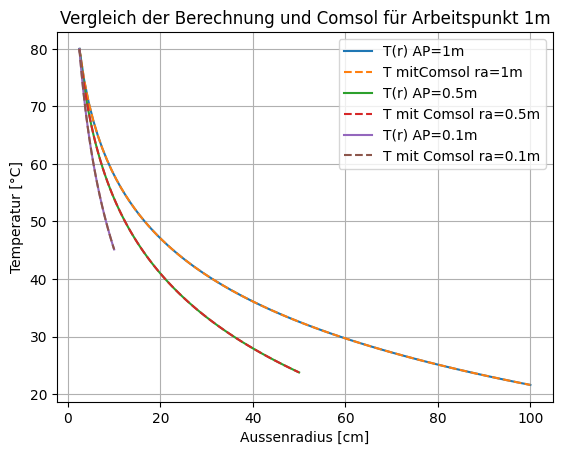

In [53]:
plt.plot(r1m*100,T1m(r1m),label="T(r) AP=1m")
plt.plot(r1m*100,TA1m,label="T mitComsol ra=1m",linestyle="--")
plt.plot(r05m*100,T5(r05m),label="T(r) AP=0.5m")
plt.plot(r05m*100,TA05m,label="T mit Comsol ra=0.5m",linestyle="--")
plt.plot(r01m*100,T01(r01m),label="T(r) AP=0.1m")
plt.plot(r01m*100,TA01m,label="T mit Comsol ra=0.1m",linestyle="--")
plt.title("Vergleich der Berechnung und Comsol für Arbeitspunkt 1m")
plt.ylabel("Temperatur [°C]")
plt.xlabel("Aussenradius [cm]")
plt.grid()
plt.legend()

**Schlussfolgerung:**

Auch mit Comsol lässt sich dies Beobachtung nachweisen.

##### Begründung dieser Beobachtung:

**Gesamtwärmewiderstand:**
$$
R_{\text{th}} =  \frac{\text{ln}(r_a/r_i)}{2 \pi k l}
$$
 
$$
R_s = \frac{1}{2 \pi r_a l h}
$$
 
Gesamtwiderstand:
$$
R_g = R_{th} + R_s
$$

In [54]:
ri = 0.025 # [m] Innendurchmesser
h = 5 # [W/(m^2*K)] Wärmeübertragungskoeffizient
Ti = 353.15 # [K] Randbedingung innen
Ta = 293.15 # [K] Umgebungdtemperatur
k = 0.5 # [W/(m*K)] Wärmeleitfähigkeit
l = 1 # [m] Länge des Rohrs

In [55]:
rg = np.linspace(0.025,1,1000)

In [56]:
Rth = np.log(rg/ri)/(2*np.pi*0.5*1)
Rs = 1/(2*np.pi*rg*1*5)
Rg = Rth+Rs

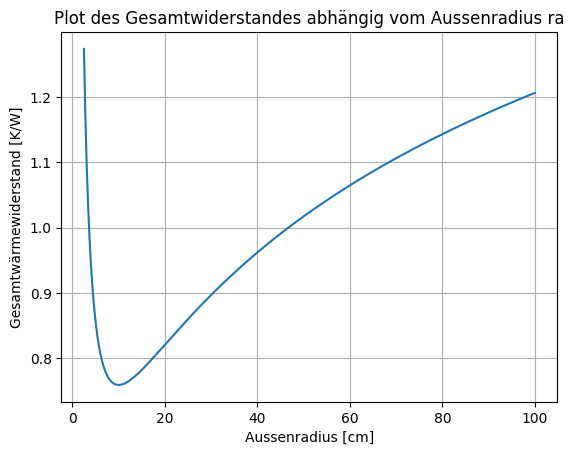

In [57]:
plt.plot(rg*100,Rg)
plt.title("Plot des Gesamtwiderstandes abhängig vom Aussenradius ra")
plt.ylabel("Gesamtwärmewiderstand [K/W]")
plt.xlabel("Aussenradius [cm]")
plt.grid()

**Berechnung des Temperaturgradienten:**

$$
\dot{Q}_{th} = \frac{\Delta T}{R_{th}} = \frac{2 \pi k l \Delta{T}}{\text{ln}(r_a/r_i)} = -k A \frac{\partial T}{\partial r}
$$

Daraus folgt:
$$
\frac{\partial T}{\partial r} = \frac{T_i -T_a}{-\text{ln}(r_a/r_i) \cdot r}
$$

In [84]:
r_agrad = [0.1, 0.25, 0.5, 0.75] # Aussenradius in [m]
dT =[]
rgrad = []
dTfunc = lambda ra,r: 60/(-np.log(ra/ri)*r)
for i in range(len(r_agrad)):
	r = np.linspace(0.0251,r_agrad[i],10000)
	rgrad.append(r)
	dT.append(dTfunc(r_agrad[i],r))

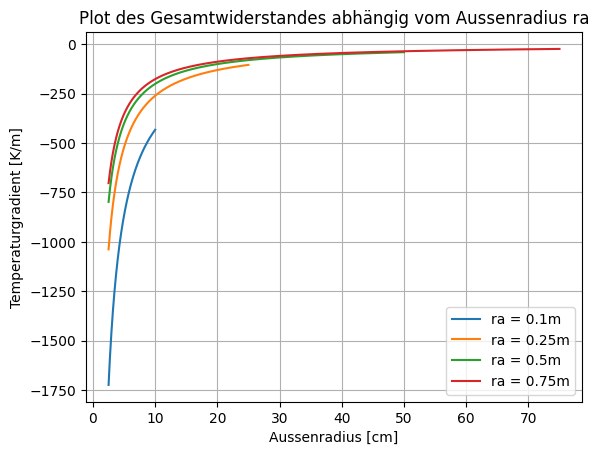

In [89]:
plt.plot(rgrad[0]*100,dT[0],label="ra = 0.1m")
plt.plot(rgrad[1]*100,dT[1],label="ra = 0.25m")
plt.plot(rgrad[2]*100,dT[2],label="ra = 0.5m")
plt.plot(rgrad[3]*100,dT[3],label="ra = 0.75m")
plt.title("Plot des Gesamtwiderstandes abhängig vom Aussenradius ra")
plt.ylabel("Temperaturgradient [K/m]")
plt.xlabel("Aussenradius [cm]")
plt.grid()
plt.legend()

**Schlussfolgerung:**

Durch die Bestimmung des Temperaturgradienten erkennt man das für ein gleiches $r$ der Faktor $\text{ln}(r_a/r_i)$ unterschiedlich ist daraus folgt diese Differenz.
$$
\frac{\partial T}{\partial r} = \frac{T_i -T_a}{-\text{ln}(r_a/r_i) \cdot r}
$$


## Aufgabe 2 Comsol 1D Axialsymmetrisch:

In [60]:
# Einlesen der Daten mit pandas
df1 = pd.read_csv("Daten/Daten1D.csv",sep=";")

Text(0.5, 1.0, 'Temperaturverlauf 1D Axialsymmetrisch')

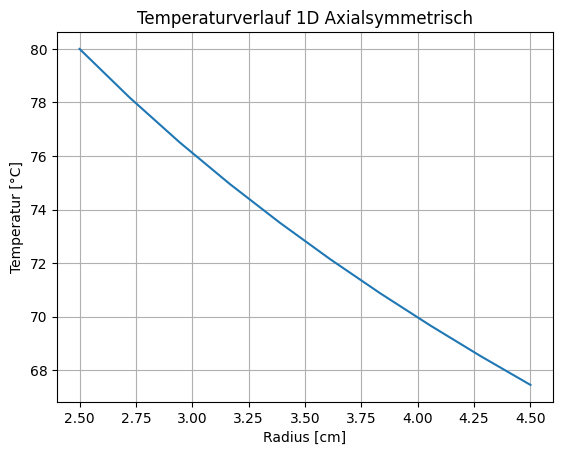

In [61]:
# Plot des Temperaturverlaufes
plt.plot(df1["R"]*100,df1["T"])
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.grid()
plt.title("Temperaturverlauf 1D Axialsymmetrisch")

## Aufgabe 3 Comsol 2D:

In [62]:
df2 = pd.read_csv("Daten/Daten2D.csv",sep=";")

Text(0.5, 1.0, 'Temperaturverlauf 2D entlang einem radial Strich')

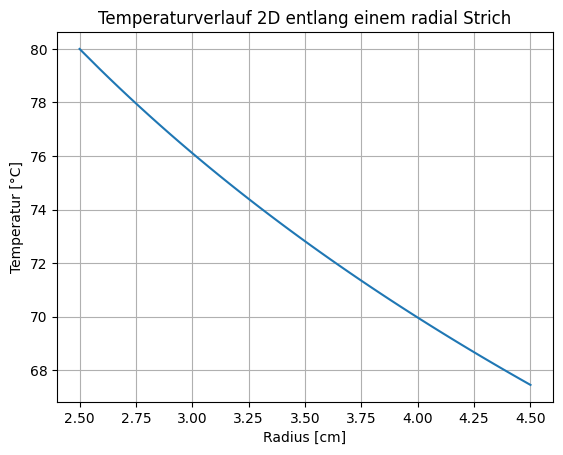

In [63]:
plt.plot(df2["R"]*100,df2["T"])
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf 2D entlang einem radial Strich")

## Aufgabe 4 Vergleich der drei Kurven:

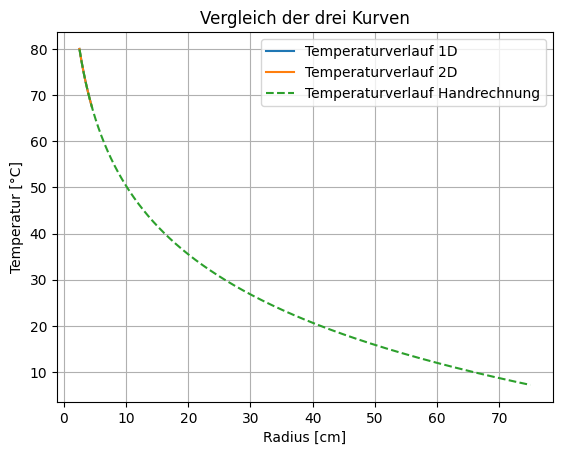

In [64]:
# Plot des Temperaturverlaufs der drei Bestimmungsweg zusammen
plt.plot(df1["R"]*100,df1["T"],label="Temperaturverlauf 1D")
plt.plot(df2["R"]*100,df2["T"],label="Temperaturverlauf 2D")
plt.plot(r*100,T(r),linestyle="--",label="Temperaturverlauf Handrechnung")
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Vergleich der drei Kurven")
plt.legend()

In [65]:
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d

# Interpolieren von Daten1D auf die x-Werte von Daten2D
interpolator = interp1d(df1["R"], df1["T"], kind='linear', fill_value='extrapolate')
y1_interp = interpolator(df2["R"])
y1_interp = np.array(y1_interp)


In [66]:
# 
x1 = np.linspace(0.025,0.045,len(df1["R"]))
x2 = np.linspace(0.025,0.045,len(df2["R"]))
T1 = T(x1)
T2 = T(x2)

**Bestimmtheitsmass:**

In [67]:
# Vergleich 1D und 2D
r21 = r2_score(y1_interp,df2["T"])
r21

0.9999939333529381

In [68]:
# Vergleich Hand und 1D
r22 = r2_score(T1,df1["T"])
r22

0.9999804581575854

In [69]:
# Vergleich Hand und 2D
r23 = r2_score(T2,df2["T"])
r23

0.997825026940608

- Mann erkennt das die einzelnen Linien nicht voneinander zu unterscheiden sind.
- Das hohe Bestimmtheitsmass sagt aus das die Linien einen sehr ähnlichen Verlauf haben.

## Aufgabe 5:

### Herleitung des Wärmeflusses:
 
#### Gegebene Skizze
Die Skizze zeigt ein System mit zwei Wärmewiderständen:
- $R_{th}$: Wärmewiderstand des festen Materials
- $R_s$: Wärmewiderstand der Oberfläche (Konvektion)

![Alternativtext](./Bilder/Model.png)

#### Quelle für das Bild: Heat Transfer J. P. Holman 
---
 
#### Berechnungsart 1:
 
##### Gesamtwärmewiderstand
$$
R_{\text{th}} =  \frac{\text{ln}(r_a/r_i)}{2 \pi k l}
$$
 
$$
R_s = \frac{1}{2 \pi r_a l h}
$$
 
Gesamtwiderstand:
$$
R_g = R_{th} + R_s
$$

---
##### Herleitung des Widerstands $R_{th}$ in $[\frac{K}{W}]$
- $\dot{Q}_{th} =  -k \cdot F \cdot \frac{\partial T}{\partial r} $ Wärmefluss $[W]$
- $F(r) = 2 \cdot \pi \cdot r \cdot l$ $[m^2]$ Oberfläche durch die Wärme fliesst. 
Da der Wärmefluss konstant ist und die Oberfläche sich mit r ändert, muss die Temperaturänderung $\frac{\partial T}{\partial r}$ von innen nach aussen mit $\frac{1}{r}$ abnehmen.

$$\partial T = \frac{\dot{Q}_{th}}{k\cdot F}~\partial r$$

$$\int_{T_i}^{T_a} 1 \,dT  = \frac{-\dot{Q}_{th}}{k 2 \pi l} \int_{r_i}^{r_a} \frac{1}{r} \, dr~\text{mit}~\dot{Q} = \text{const.}, k = \text{const.}$$

$$\Delta T = - \frac{-\dot{Q}_{th}}{2  \pi k l} (\text{ln}(r_a)-\text{ln}(r_i))$$

$$
\dot{Q}_{th} = -\frac{2 \pi k l \Delta T}{\ln\left(\frac{r_a}{r_i}\right)}
$$

$$
R_{th} = \frac{\Delta T}{\dot{Q}_{th}} = \frac{\text{ln}(r_a/r_i)}{2 \pi k l}
$$

---
 
##### Herleitung des Widerstands $R_s$ in $[\frac{K}{W}]$
- $A = 2 \cdot \pi \cdot r_a \cdot l$ $[m^2]$ Äussere Oberfläche an der Konvektion auftritt.
$$
\dot{Q}_{s} = h A (T_i -T_a)  = 2 \pi r_a l  h \Delta T
$$
$$
R_s = \frac{\Delta T}{\dot{Q}_{s}} = \frac{1}{2 \pi r_a l h}
$$
---
##### Wärmestrom $\dot{Q}$ in $[W]$
$$
\dot{Q} = \frac{\Delta T}{R_g} = \frac{2 \pi l (T_i-T_a)}{\frac{\ln\left(\frac{r_a}{r_i}\right)}{k}+\frac{1}{r_a h}}
$$

---
##### Wärmestrom pro Längeneinheit $\dot{q}$ in $[\frac{W}{m}]$
$\dot{Q}$ mit $\frac{1}{l}$ multiplizieren, wobei $l=1~\text{m}$
$$
\dot{q} = \frac{2 \pi (T_i-T_a)}{\frac{\ln\left(\frac{r_a}{r_i}\right)}{k}+\frac{1}{r_a h}}
$$


#### Berechnungsart 2:

Fouriesches Gesetz:

- $\dot{Q} =  -k \cdot F \cdot \frac{\partial T}{\partial r} $ Wärmefluss $[W]$
- $F(r) = 2 \cdot \pi \cdot r \cdot l$ $[m^2]$ Oberfläche durch die Wärme fliesst. 
- $\Delta T$ ist hier nicht wie in der ersten Berechnungsart konstant, sondern abhängig von $r_a$

Da der Wärmefluss konstant ist und die Oberfläche sich mit r ändert, muss die Temperaturänderung $\frac{\partial T}{\partial r}$ von innen nach aussen mit $\frac{1}{r}$ abnehmen.

$$\partial T = \frac{\dot{Q}}{k\cdot F}~\partial r$$

$$\int_{T_{r_i}}^{T_{r_a}} 1 \,dT  = \frac{-\dot{Q}}{k 2 \pi l} \int_{r_i}^{r_a} \frac{1}{r} \, dr~\text{mit}~\dot{Q} = \text{const.}, k = \text{const.}$$

$$\Delta T(r_a) = \frac{\dot{Q}}{2  \pi k l} (\text{ln}(r_a)-\text{ln}(r_i))$$

$$
\dot{Q} = \frac{2 \pi k l \Delta T(r_a)}{\ln\left(\frac{r_a}{r_i}\right)}
$$

**Wärmefluss pro m:** (mit l = 1 m dividieren)
$$
\dot{q} = \frac{2 \pi k \Delta T(r_a)}{\ln\left(\frac{r_a}{r_i}\right)}
$$


Wie so ist $\dot{Q} = \text{const.}$?
- Wenn der Wärmefluss durch die einzelnen Zwischenebenen, wie unten in der Abbildung ersichtlich, nicht konstant wäre, so würde es zu einer Abkühlung oder Erwärmung einzelner Ebenen führen. Was bedeutet, das Problem ist nicht mehr stationär.

![Alternativtext](./Bilder/Zwischeneben.png)

[Quelle für das Bild:](https://www.tec-science.com/de/thermodynamik-waermelehre/waerme/temperaturverlaufe-und-warmestrome-durch-verschiedene-geometrien/)

#### Analytisch:

- $A = \frac{-h \cdot 60}{h \cdot \text{ln}(\frac{r_a}{r_i})+\frac{k}{r_a} }$

- $ q =  \frac{-k \cdot A}{r_a}$

- $
\dot{q} = \frac{2 \pi (T_i-T_a)}{\frac{\ln\left(\frac{r_a}{r_i}\right)}{k}+\frac{1}{r_a h}}
$

- $\Delta{T_1} = T_{r_i}-T_{r_a} = + 353.15~\text{K} - A \cdot \text{ln}(\frac{r}{r_i})  - 353.15~\text{K} =   -A \cdot \text{ln}(\frac{r}{r_i}) $
- $\Delta{T_2} = T_{i}-T_{a} = + 353.15~\text{K} - 293.15~\text{K} = 60~\text{K}$


In [91]:
# Funktion für die Berechnung von A für ein ra
A_cal = lambda ra: (-h*60)/(h*np.log(ra/ri)+k/ra) 

# Funktion für die Berechnung der Wärmestromdichte mit ra und A
q_cal = lambda A,ra: -k*A/ra

# Wärmefluss pro Längeneinheit über Berechnungsart1:
q_dot_cal = lambda ra: 2*np.pi*60/((np.log(ra/ri)/k)+(1/(ra*h)))

# Wärmefluss pro Längeneinheit über Berechnungsart 2:
q_dot_cal2 = lambda delT,ra: 2*np.pi*k*delT/((np.log(ra/ri)))

# Berechnug der Temperaturdifferenz
delT_cal = lambda A,ra: -A*np.log(ra/ri)

# ra von 0.0251 m bis 0.2 m
ra = np.linspace(0.0251,0.2,1000)

# Bestimmung der Werte des A Parameters
A = A_cal(ra)

# Berechnung DeltaT
delT1 = delT_cal(A,ra)

# Berechnung Wärmefluss pro Längeneinheit
q_dot = q_dot_cal(ra)
q_dot1 = q_dot_cal2(delT1,ra)

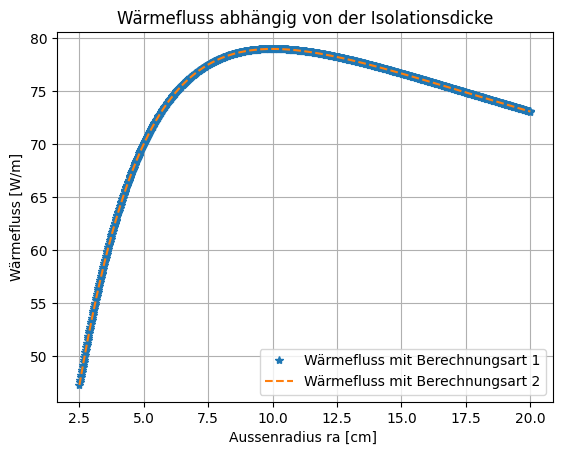

In [71]:
plt.plot(ra*100,q_dot,"*",label= "Wärmefluss mit Berechnungsart 1")
plt.plot(ra*100,q_dot1,"--", label = "Wärmefluss mit Berechnungsart 2")
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke")
plt.legend()
plt.grid()

## Aufgabe 6:

**Biot-Zahl:**
- Die Biot-Zahl gibt bei Wärmetransport durch die Oberfläche das Verhältnis des Wärmeleitwiderstandes des Körpers zum Wärmeübergangswiderstand des umgebenden Mediums an. 
- Bi < 1: Konvektion ist dominant;
- Bi ≈ 1: keine dominante Wärmeübertragung;
- Bi > 1: Wärmeleitung ist dominant.


- $L = \frac{\text{Volumen}}{\text{Oberfläche, durch die Wärme strömt}} = \frac{r^2 \cdot \pi \cdot l}{2 \cdot r\cdot \pi \cdot l } = \frac{r}{2}$

**Berechnungsart 1:** Für die Randoberfläche
- $Bi = \frac{h \cdot L}{k} = \frac{h \cdot \frac{r_a}{2}}{k}$
 $$\dot{q}= \frac{\Delta T \cdot \pi \cdot h \cdot r_a}{\text{ln}(r_a/r_i) \cdot Bi}$$
**Da wir nur die Biot-Zahl am Rand betrachten, können wir diese Berechnungsart verwenden!**

**Die charakteristische Länge wird in der Literatur für einen Zylinder als $r_a$ angegeben, ebenso bei einer Kugel, dazu wurde keine sinnvolle Begründung gefunden. Auch deckt sich diese Definition nicht mit der Definition $V/O$, wie oben in der Berechnung gezeigt wurde. Schlussendlich sind die Einschätzungen, ob Konvektion oder Konduktion dominant sind, das einzige, was sich ändert. Sollten diese für $L=r_a$ definiert sein, können diese mit $\frac{1}{2}$ multipliziert werden und es kann die gleiche Aussage getätigt werden.**

**Berechnugsart 2:** Biot-Zahl für den Körper da die in ihm Oberfläche durch die Wärme tritt nicht konstant ist.
- $Bi = \frac{R_{th}}{R_s}$ definiert ist. Wobei $R_{th}$ der Wärmewiderstand in $[\frac{K}{W}]$ und $R_s$ der Wärmeübergangswiderstand in $[\frac{K}{W}]$ sind.
$$R_{th} = \frac{\text{ln}(r_a/r_i)}{2 \pi L k}$$
$$R_s = \frac{1}{2 \pi \cdot r_a \cdot L \cdot h}$$
Daraus würde sich die Biot-Zahl
$$Bi = \frac{\text{ln}(r_a/r_i) \cdot r_a \cdot h}{k}$$

**Bestimmung der Charakteristischen Länge:**


In [72]:
# ra von 0.0251 m bis 1m
ra2 = np.linspace(0.0251,1,1000000)

# Charakteristische Länge (Maximale Temperaturdifferenz)
L = ra2

# Berechnung der Biot-Zahl 
Bi_cal = lambda L: h*(L)/k
Bi = Bi_cal(L)
Bi[-1]

np.float64(10.0)

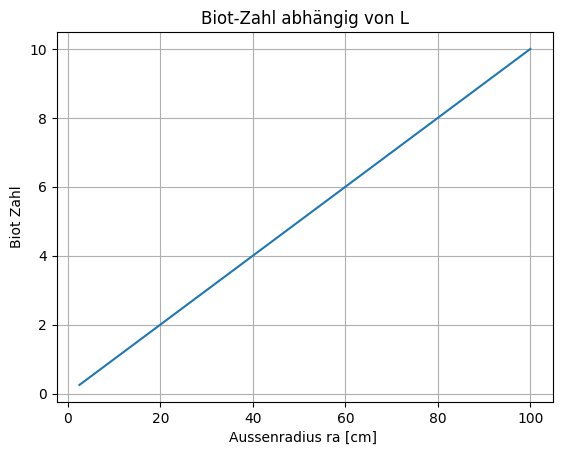

In [73]:
plt.plot(ra2*100,Bi)
plt.ylabel("Biot Zahl")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Biot-Zahl abhängig von L")
plt.grid()

In [74]:
A2 = A_cal(ra2)
delT3 = delT_cal(A2,ra2)

In [75]:
# Wärmefluss pro Längeneinheit mit Biot-Zahl
q_dot_cal2 = lambda delT,ra,Bi: (2*delT*np.pi*ra*h)/(np.log(ra/ri)*Bi)
q_dot2 = q_dot_cal2(delT3,ra2,Bi)

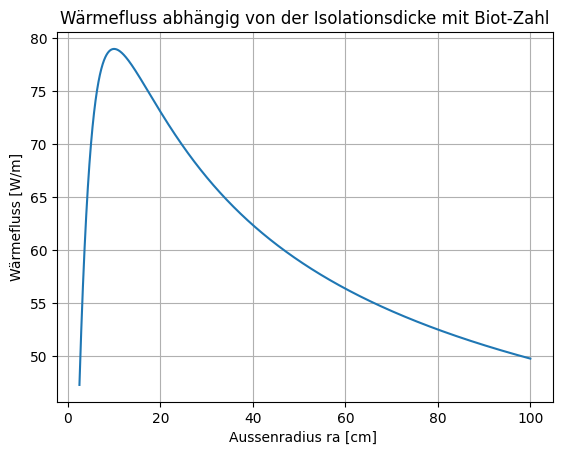

In [76]:
plt.plot(ra2*100,q_dot2)
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke mit Biot-Zahl")
plt.grid()

## Aufgabe 7:

In [77]:
# Bestimmen des Maximums mit Aufgabe 5:
maxQ1 = np.max(q_dot1)
index1 = np.argmax(q_dot1)
print(maxQ1,len(q_dot1),index1)

78.99090665866984 1000 428


In [78]:
x1 = index1/len(q_dot1)*(ra.max()-ra.min())*100+2.51
print(f"Das Maximum ist bei {round(x1,2)} cm.")

Das Maximum ist bei 10.0 cm.


In [79]:
# Bestimmen des Maximums mit Aufgabe 6:
maxQ2 = np.max(q_dot2)
index2 = np.argmax(q_dot2)
print(maxQ2,len(q_dot2),index2)

78.99090836662414 1000000 76828


In [80]:
x2 = (index2)/len(q_dot2)*(ra2.max()-ra2.min())*100+2.51
print(f"Das Maximum ist bei {round(x2,2)} cm.")

Das Maximum ist bei 10.0 cm.


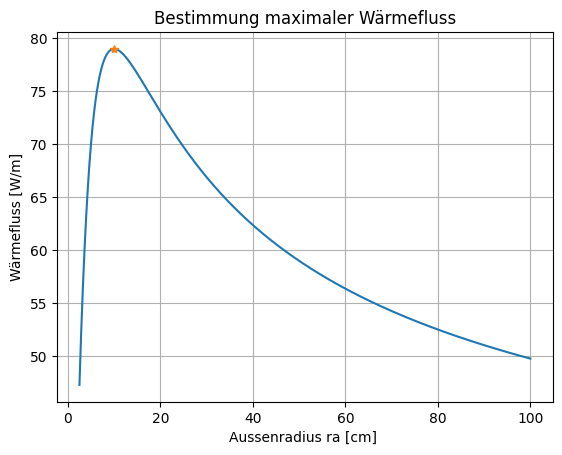

In [81]:
plt.plot(ra2*100,q_dot2)
plt.plot(x2,maxQ2,"*")
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Bestimmung maximaler Wärmefluss")
plt.grid()

- Der maximale Wärmefluss mit 79 $[\frac{W}{m}]$  bei $r_a = 10~\text{[cm]}$ 

#### Überprüfung:
Wieso entsteht dieser kritische Radius?:
- Je dicker die Isolation, desto besser ist die Isolation, aber auch die Oberfläche wächst mit der Dicke der Isolation $\rarr$ höhere Konvektion.
$$R = (\frac{\text{ln}(r_a/r_i)}{2 \pi L k}+\frac{1}{2 \pi r_a L h})~\text{Wärmewiderstand}$$ 

**Extremstelle aufsuchen:**
$$\frac{\partial R}{\partial r_a} = 0 \rarr r_{krit} = \frac{k}{h} = 0.1~\text{m} = 10~\text{cm} $$

**Hinreichende Bedingung:**
$$\frac{\partial^2 R}{\partial r_a^2} = \frac{-1}{2 \pi l r_a^2 k} + \frac{2}{2 \pi l r_a^3 h} $$
$$\frac{\partial^2 R}{\partial r_a^2}(r_{krit}) > 0 \rarr \text{Minimum} \rarr \text{Wärmefluss ist maximal.}$$

[Quelle der Formel](https://n.ethz.ch/~jgeurts/dateien/zusammenfassungen/Thermodynamik_II_Zusammenfassung.pdf)